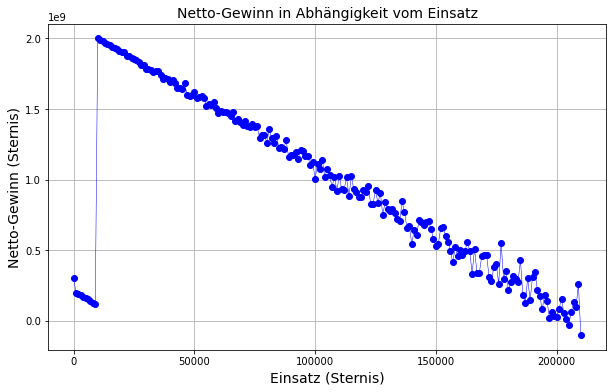

In [3]:
import random
import matplotlib.pyplot as plt

# Funktion zur Simulation mit allen Regeln und Berücksichtigung des Einsatzes
def simulate_money_tree_with_rules(bet, days):
    total_gain = 0

    for _ in range(days):
        if bet <= 1000:
            # Regel 1: 3 Säcke mit jeweils 1.000 Sternis
            gain = 3 * 1000
        elif 1001 <= bet <= 9999:
            # Regel 2: 70% für 3 Säcke mit 1.000 Sternis, 30% für 3 Säcke mit dem Einsatz
            if random.random() < 0.7:
                gain = 3 * 1000
            else:
                gain = 3 * bet
        else:
            # Regel 3: 70% für 3 Säcke mit 10.000 Sternis, 30% für 3 Säcke mit dem Einsatz
            if random.random() < 0.7:
                gain = 3 * 10000
            else:
                gain = 3 * bet
        
        total_gain += gain

    # Netto-Gewinn berechnen: Abzug des Einsatzes für jeden Tag
    total_investment = bet * days
    net_gain = total_gain - total_investment

    return total_gain, net_gain

# Funktion zur Simulation und Berechnung des Netto-Gewinns für verschiedene Einsätze
def simulate_net_gain_for_bets(max_bet, days):
    bets = list(range(0, max_bet + 1, 1000))  # Einsätze von 0 bis max_bet in Schritten von 1000
    net_gains = []

    for bet in bets:
        _, net_gain = simulate_money_tree_with_rules(bet, days)
        net_gains.append(net_gain)

    return bets, net_gains

# Simulation für Einsätze von 0 bis 100.000 Sternis über 365 Tage
max_bet = 210000
days = 100000
bets, net_gains = simulate_net_gain_for_bets(max_bet, days)

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(bets, net_gains, marker='o', linestyle='-', color='b',linewidth=0.5)
plt.title("Netto-Gewinn in Abhängigkeit vom Einsatz",fontsize=14)
plt.xlabel("Einsatz (Sternis)",fontsize=14)
plt.ylabel("Netto-Gewinn (Sternis)",fontsize=14)
plt.grid(True)
plt.show()
